# Covote construction
## UN resolution data processing

In [1]:
# !git clone -b master https://github.com/StefanoNasini/Country-by-country-2022-2023-international-relationships
# !cd Country-by-country-2022-2023-international-relationships

In [2]:

import os
root = os.getcwd()
root = os.path.dirname(root)

In [3]:


files = os.listdir(os.path.join(root, "raw_data", "UN"))

theme2vote = {}

for file in files:
    if file.endswith(".txt"):
        with open(os.path.join(root, "raw_data", "UN", file), 'r') as f:
            lines = f.readlines()
            theme2vote[file] = lines

In [4]:
vote_example = list(theme2vote.values())[0]
print(vote_example[:10])

['Y AFGHANISTAN\n', 'A ALBANIA\n', 'Y ALGERIA\n', 'A ANDORRA\n', 'Y ANGOLA\n', 'Y ANTIGUA AND BARBUDA\n', 'Y ARGENTINA\n', 'A ARMENIA\n', 'N AUSTRALIA\n', 'N AUSTRIA\n']


In [5]:
# From the vote example, retrieve the set of countriies
UN_countries = []
for s in vote_example:
    if s[0:2] in ['Y ', 'A ', 'N ']: # for now, yes/no/abstention is information that is not needed
        c = s[2:-1]  if  s[-1] == '\n' else s[2:]
    else:
        c = s[:-1] if s[-1] == '\n' else s[:]
    UN_countries.append(c.lower())


In [6]:
# To improve the work, a consistent name using three letters are used. 
tri2name = {} # trigraph to name
name2tri = {} # name to trigraph
with open(os.path.join(root, "src", "utils", "trigraphs.txt"), "r") as f:
    lines = f.readlines()
    for line in lines:
        if line[0] == '-':
            continue
        trigraph = line[0:3]
        fullname = line[4:-1]
        fullname = fullname.lower()
        name2tri[fullname] = trigraph
        tri2name[trigraph] = fullname

In [7]:
# In other data, the country name can vary in format. To resolve this, we store all the aka's (alternative names) in a dictionary. 
tri2aka = {}
for (tri, name) in tri2name.items():
    tri2aka[tri] = [name]

def belongs_aka(name):
    """Check if a name had been recorded in the tri2aka dictionary. 
    If it exists, return its (unique) trigraph, return False otherwise"""
    name = name.lower()
    for (tri, names) in tri2aka.items():
        if name in names:
            return tri
    return False

def add_aka(name, aka):
    "Add the new aka to the country with the name that has already been recorded."
    for (tri, names) in tri2aka.items():
        name = name.lower()
        if name in names:
            aka = aka.lower()
            if aka in names:
                return None
            names.append(aka)
            return None
    raise Exception(f"{name} not found")

def add_aka3(tri, aka):
    "Add the new aka to the country with a given trigraph"
    aka = aka.lower()
    if aka in tri2aka[tri]:
        return None
    tri2aka[tri].append(aka)

In [8]:
# This block is to add common alternative names. 
# A big part of them are country names with a title. Some documents put the title first while others put title after a comma.
# For instance : title first : Republic of Armenia / title last : Armenia, Republic of

add_aka3("RUS", "russian federation")
add_aka3("RUS", "Russia")
add_aka('russian federation', 'Russia')
add_aka('czechia', 'czech republic')
add_aka('turkiye', 'turkey')
add_aka('turkiye', 'Türkiye')
add_aka('republic of korea', 'south korea')

add_aka("cote d'ivoire", "côte d'ivoire")
add_aka3('AIA', 'Anguilla, United Kingdom-British Overseas Territory')
add_aka3('ARM', 'Armenia, Republic of')
add_aka3('ABW', 'Aruba, Kingdom of the Netherlands')
add_aka3('AZE', 'Azerbaijan, Republic of')
add_aka3('BHS', 'Bahamas, The')
add_aka3('BHR', 'Bahrain, Kingdom of')
add_aka3('BLR', 'Belarus, Republic of')
add_aka3('COM', 'Comoros, Union of the')
add_aka3('COG', 'Congo, Democratic Republic of the')
add_aka3('COG', 'Congo, Republic of')
add_aka3('HRV', 'Croatia, Republic of')
add_aka3("LAO", "Lao People’s Democratic Republic".lower())
add_aka3("GBR", "United Kingdom of Great Britain and Northern Ireland".lower())
add_aka3("USA", "United States of America".lower())
add_aka3('AFG', "Afghanistan, Islamic Republic of")
add_aka("andorra", "Andorra, Principality of")
add_aka3("BOL", 'bolivia')
add_aka('curacao', "Curaçao, Kingdom of the Netherlands")

add_aka3("MDG", "Madagascar, Republic of")
add_aka3("MHL", "Marshall Islands, Republic of the")
add_aka3("MRT", "Mauritania, Islamic Republic of")

add_aka3('CHN', "China, People's Republic of")
add_aka3('HKG', "Hong Kong Special Administrative Region, People's Republic of China")
add_aka3('IRN', "iran")
add_aka3('IRN', "Iran, Islamic Republic of")
add_aka3('KOR', 'Korea, Republic of')
add_aka3('KGZ', 'Kyrgyz Republic')
add_aka3('MAC', "Macao Special Administrative Region, People's Republic of China")
add_aka3('FSM', 'micronesia')
add_aka3('FSM', 'Micronesia, Federated States of')
add_aka3('MDA', 'moldova')
add_aka3('MDA', 'Moldova, Republic of')

add_aka3("MSR", "Montserrat, United Kingdom-British Overseas Territory")
add_aka3("MOZ", "Mozambique, Republic of")
add_aka3("NRU", "Nauru, Republic of")

add_aka('sao tome and principe', "São Tomé and Príncipe, Democratic Republic of")
add_aka('slovakia', 'slovak republic')

add_aka3('BLM', 'St. barthelemy')
add_aka3( 'SHN', 'St. helena, ascension, and tristan da cunha')
add_aka3( 'KNA', 'St. kitts and nevis')
add_aka3( 'LCA', 'St. lucia')
add_aka3( 'MAF', 'St. martin')
add_aka3( 'SPM', 'St. pierre and miquelon')
add_aka3( 'VCT', 'St. vincent and the grenadines')

add_aka3('TZA', 'tanzania')
add_aka3('TZA', 'Tanzania, United Republic of')
add_aka3('VEN', 'venezuela')
add_aka3('VEN', 'Venezuela, República Bolivariana de')
add_aka('viet nam', 'vietnam')
add_aka('cabo verde', 'cape verde')
add_aka('timor-leste', 'east timor')
add_aka3('KOR', 'Korea, South')
add_aka3("ALN", "Åland Islands")
add_aka('cape verde', 'Cabo Verde [Cape Verde]')
add_aka('bolivia', 'Plurinational State of Bolivia')
add_aka('iran', "Islamic Republic of Iran")
add_aka('micronesia', 'Federated States of Micronesia')
add_aka3("STP", "São Tomé and Príncipe")
add_aka3("VEN", "Bolivarian Republic of Venezuela")
add_aka3("PRK", "north korea")
add_aka3("COG", "Congo [Republic of the Congo]")
add_aka("cote d'ivoire", "Côte d'Ivoire [Ivory Coast]")
add_aka("curacao", "Curaçao")
add_aka("czechia", "Czechia [Czech Republic]")
add_aka3("PRK", "Democratic People's Republic of Korea [North Korea]")
add_aka("eswatini", "Eswatini [Swaziland]")
add_aka3("FLK", "Falkland Islands (Malvinas)")
add_aka("France", "France [French Republic]")
add_aka3("ATF", "French Southern Territories")
add_aka("cote d'ivoire", "Ivory Coast")
add_aka3("COG", "Republic of the Congo")
add_aka3("SYR", "Syria")
add_aka3("BRN", "brunei")
add_aka3("LAO", 'laos')
add_aka("bahamas", "the bahamas")
add_aka3("COD", 'D.R. Congo')
add_aka("china", "P.R. China")
add_aka3("VCT", 'saint vincent')
add_aka("eswatini", 'swaziland')
add_aka("macau", "macao")
add_aka("macau", "Macao, China")
add_aka("taiwan", "chinese taipei")

add_aka3("EGY", "Egypt, Arab Republic of")
add_aka3("GNQ", "Equatorial Guinea, Republic of")
add_aka3("ERI", "Eritrea, The State of")
add_aka3("EST", "Estonia, Republic of")
add_aka3("SWZ", "Eswatini, Kingdom of")
add_aka3("ETH", "Ethiopia, The Federal Democratic Republic of")
add_aka3("FJI", "Fiji, Republic of")
add_aka3("GMB", "Gambia, The")
add_aka3("KAZ", "Kazakhstan, Republic of")
add_aka3("XKS", "Kosovo, Republic of")
add_aka3("LVA", "Latvia, Republic of")
add_aka3("LSO", "Lesotho, Kingdom of")
add_aka3("LTU", "Lithuania, Republic of")
add_aka3("NLD", "Netherlands, The")
add_aka3("MKD", "North Macedonia, Republic of")
add_aka3("PLW", "Palau, Republic of")
add_aka3("POL", "Poland, Republic of")
add_aka3("SMR", "San Marino, Republic of")
add_aka3("SRB", "Serbia, Republic of")
add_aka3("SXM", "Sint Maarten, Kingdom of the Netherlands")
add_aka3("SVN", "Slovenia, Republic of")
add_aka3("SSD", "South Sudan, Republic of")
add_aka3("TJK", "Tajikistan, Republic of")
add_aka3("TLS", "Timor-Leste, Democratic Republic of")
add_aka3("TUR", "Türkiye, Republic of")
add_aka3("UZB", "Uzbekistan, Republic of")
add_aka3("YEM", "Yemen, Republic of")
add_aka3("COG", "Congo, Republic of the")
add_aka3("HKG", "Hong Kong, China")

In [9]:
with open(os.path.join(root, "src", "utils", "tri2aka.json"), 'w') as f:
    f.write(str(tri2aka))

In [10]:
# stock all the trigraphs from UN countries
UN_tri = []
for name in UN_countries:
    name = name.lower()
    if name not in name2tri.keys():
        print(name)
        continue
    UN_tri.append(name2tri[name])

In [11]:
import pandas as pd

In [12]:
# create a dataframe where rows are themes ; columns are countries
df = pd.DataFrame(index=list(theme2vote.keys()), columns=UN_tri)
n_topics, n_countries = df.shape

len(UN_countries)

193

In [13]:
# fill the dataframe with vote result (Yes/No/Abstain/Missing)
YAN_code = dict(Y=1, A=-1, N=0)
for policy_index, votes in enumerate(theme2vote.values()):
    for country_index, s in enumerate(votes):
        if s[0:2] in ['Y ', 'A ', 'N ']:
            vote = YAN_code[s[0]]
            if s[-1] == '\n':
                c = s[2:-1].lower()
            else:
                c = s[2:].lower()
            c = belongs_aka(c)
 
            df.iloc[policy_index, country_index] = vote
        else: # will stay N/A
            pass

In [14]:
df

,AFG,ALB,DZA,AND,AGO,ATG,ARG,ARM,AUS,AUT,...,TZA,USA,URY,UZB,VUT,VEN,VNM,YEM,ZMB,ZWE
"A global call for concrete action for the elimination of racism, racial discrimination, xenophobia and related intolerance and the comprehensive implementation.txt",1,-1,1,-1,1,1,1,-1,0,0,...,1,0,1,1,NaN,NaN,1,1,1,1
"Addressing and countering the world drug problem through a comprehensive, integrated and balanced approach.txt",1,1,-1,1,1,1,1,1,1,1,...,-1,1,1,-1,NaN,NaN,-1,-1,1,1
Aggression against Ukraine.txt,1,1,-1,1,-1,1,1,-1,1,1,...,-1,1,1,NaN,1,NaN,-1,1,1,-1
Assistance to Palestine refugees.txt,1,1,1,1,1,1,1,1,1,1,...,NaN,-1,-1,1,1,NaN,1,1,1,1
"Combating glorification of Nazism, neo-Nazism and other practices that contribute to fuelling contemporary forms of racism, racial discrimination, xenophobia and related intolerance.txt",-1,0,1,0,1,1,1,1,0,0,...,1,0,1,1,NaN,NaN,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Towards a new international economic order.txt,1,0,1,0,1,1,1,NaN,0,0,...,1,0,1,1,1,NaN,1,1,1,NaN
Transparency in armaments.txt,1,1,-1,1,1,1,1,1,1,1,...,1,1,1,1,1,NaN,NaN,1,1,1
Treaty banning the production of fissile material for nuclear weapons or other nuclear explosive devices.txt,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,NaN,1,1,NaN,NaN
Treaty on the Prohibition of Nuclear Weapons.txt,1,0,1,1,1,1,-1,-1,-1,1,...,1,0,1,1,1,NaN,1,1,NaN,1


In [15]:
# trigraphs.txt is in the same directory but is not one of the theme
if "trigraphs.txt" in df.index:
    df.drop("trigraphs.txt")

# keep track of where "Yes" is voted denoted by 1, everything else default to 0
yes = df.where(df==1, 0) 

# keep track of where "No" is voted denoted by 1, everything else default to 0
no = (df+1).where(df==0, 0)

In [16]:
len(df.index)

89

In [17]:
# yes.to_csv("countries_yes.csv", index=False)
# no.to_csv("countries_no.csv", index=False)

In [18]:
# start doing stats between countries
# yes.columns

In [19]:
# covotes = two countries voting the same. Namely Yes/Yes or No/No. 

covotes = pd.DataFrame(0, columns= sorted(list(UN_tri)), index=sorted(list(UN_tri)))

for dff in [yes, no]:
    for t in range(n_topics):
        print(t, end=' ')
        votes = dff.iloc[t, :]
        votes_filtered = votes[votes==1] # the list of countries that vote yes / no respectively
        votes_filtered = votes_filtered.index 
        for c in votes_filtered:
            covotes[c][votes_filtered]+=1 # update covote of pairs of countries from the list votes_filtered

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 

In [20]:
# contravotes = two countries voting differently. 

contravotes = pd.DataFrame(0, columns= sorted(list(UN_tri)), index=sorted(list(UN_tri)))

for t in range(n_topics):
    print(t, end=' ')
    votes = yes.iloc[t, :]
    votes_filtered = votes[votes==1]
    votes_filtered = votes_filtered.index
    negvotes = no.iloc[t, :]
    negvotes_filtered = negvotes[negvotes==1]
    negvotes_filtered = negvotes_filtered.index
    for c in negvotes_filtered:
        contravotes[c][votes_filtered] += 1

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 

In [21]:
import numpy as np
arr = covotes.to_numpy()

# Set diagonal elements to zero
np.fill_diagonal(arr, 0)

# Convert back to DataFrame
covotes = pd.DataFrame(arr, columns=covotes.columns, index=covotes.index)


(array([1181.,  836.,  460.,  770., 1522., 1792., 3182., 3952., 5768.,
        3866., 4048., 3242., 4424., 1998.,  208.]),
 array([ 0.        ,  5.46666667, 10.93333333, 16.4       , 21.86666667,
        27.33333333, 32.8       , 38.26666667, 43.73333333, 49.2       ,
        54.66666667, 60.13333333, 65.6       , 71.06666667, 76.53333333,
        82.        ]),
 <BarContainer object of 15 artists>)

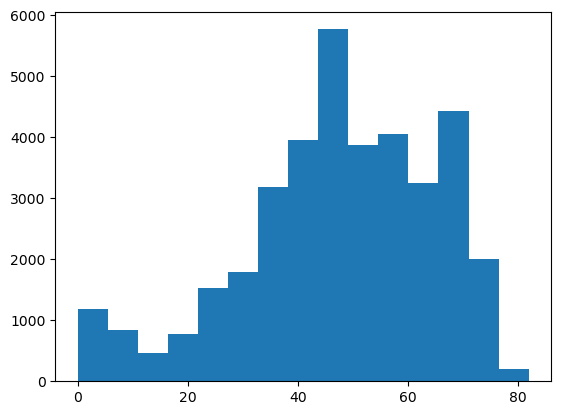

In [22]:
# Inspect covotes' distribution

import matplotlib.pyplot as plt
plt.hist(covotes.to_numpy().flatten(), bins=15)

(array([10428.,  1607.,   883.,  1310.,  1760.,  1943.,  1436.,   670.,
          253.,   110.,    27.,    20.,    24.,    40.,   129.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31., 34., 37.,
        40., 43., 46.]),
 <BarContainer object of 15 artists>)

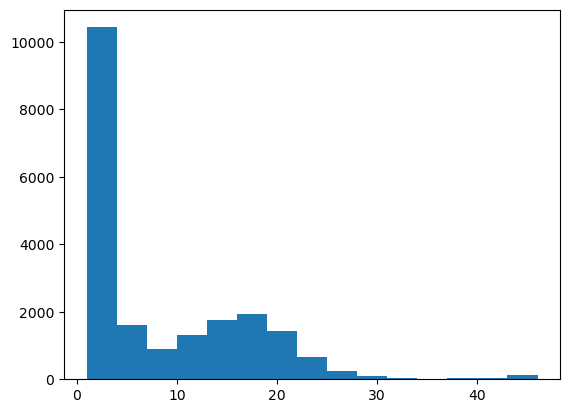

In [23]:
# Inspect contravotes' distribution

import matplotlib.pyplot as plt
thelist = contravotes.to_numpy().flatten()
thelist = [i for i in iter(thelist) if i!= 0]
plt.hist(thelist, bins=15)

In [24]:
import numpy as np

In [25]:
15, 26, 32
np.percentile(covotes, 25)

38.0

In [36]:
if "constructed_network" not in os.listdir(root):
    os.mkdir("constructed_network")

covotes.to_csv(os.path.join(root, "constructed_network", "covotes.csv"))

In [37]:
contravotes.to_csv(os.path.join(root, "constructed_network", "contravotes.csv"))

In [28]:
# create a dictionary orgs. Keys are name of organisation. Values are lists of member countries. 
orgs = {}
for filename in os.listdir(os.path.join(root, "raw_data", "org")):
    name, file_extension = os.path.splitext(filename)
    if '.txt' in file_extension:
        with open(os.path.join(root, "raw_data", "org", filename), 'r', encoding='utf-8') as f:
            orgs[name] = f.read()

In [29]:
# However, due to diverse source for member countries, their naming is not consistent. In order to address them efficiently, 
# it is useful to work with aka2name. 

def try_add_comma(namewithcomma):
    """A function that helps writing the function add_aka3 when a country doesn't exist in tri2aka, 
    by dealing with the case with commaand the title in last, or by changing some countries starting with Saint. 
    and replace St. with Saint.  """
    
    if namewithcomma[:3] == 'St.':
        newname = 'saint '+namewithcomma[3:]
        if (the_tri:=belongs_aka(newname)):
            add_aka3(tri, namewithcomma)
            print(f'add_aka3("{the_tri}", "{namewithcomma}")')
            return None
        else:
            raise Exception(f"{namewithcomma} not found")

    if (pos:=namewithcomma.find(',')) == -1:
        raise Exception(f"{namewithcomma} no comma")
    name = namewithcomma[:pos].lower()
    if (the_tri:=belongs_aka(name)):
        add_aka3(the_tri, namewithcomma)
        print(f'add_aka3("{the_tri}", "{namewithcomma}")')
    else:
        raise Exception(f"{namewithcomma} and {name} not found")


In [30]:
# Apply previous function to list of members in org. 

for (org, members) in orgs.items():
    l_mem = members.split('\n')
    for mem in l_mem:
        if mem.strip() == '':
            continue
        mem = mem.strip()
        if not belongs_aka(mem):
            try_add_comma(mem)

In [31]:
# Keep track the total set of countries present in the data for the organizations

countries_org = set()
for (org, members) in orgs.items():
    l_mem = members.split('\n')
    for mem in l_mem:
        mem = mem.strip()
        if mem == '':
            continue
        if belongs_aka(mem):
            countries_org.add(belongs_aka(mem))
        else:
            print(mem)
            raise KeyboardInterrupt

In [32]:
# examine whether there are countries present in org data but not UN data
countries_all = countries_org.union(UN_tri)
added = False

In [33]:
# modify the dataframe by adding 0 as votes for countries outside UN
if not added:
    for c in countries_org.difference(UN_tri):
        df[c] = 0
        added = True

In [34]:
# store organization data in dictionary form

orgs_d = {}

for (org, members) in orgs.items():
    d_mem = {}
    l_mem = members.split('\n')
    for mem in l_mem:
        mem = mem.strip()
        if mem == '':
            continue
        assert belongs_aka(mem)
        tri = belongs_aka(mem)
        d_mem[tri] = 1
    for tri in countries_org.difference(d_mem.keys()):
        d_mem[tri] = 0
    assert len(d_mem) == len(countries_org)
    orgs_d[org] = d_mem

In [35]:
with open(os.path.join(root, "src", "utils", "orgs_d.json"), 'w') as f:
    f.write(str(orgs_d))